Assignment 2 : AutoML

Mame : Siddharth Pawar (002225020)



**DATASET** : GrubHub Data

Data can be used to study merchants of justeat, or cuisines or delivery time and cost , review ratings etc.

Data attributes include:
"searched_zipcode","searched_lat","searched_lng","searched_address","searched_state","searched_city","searched_metro","is_gh","latitude","longitude","distance","loc_name","loc_number","url","address","cuisines","delivery_fee_raw","delivery_fee","delivery_time_raw","delivery_time","service_fee","phone","review_count","review_rating","RunDate","restaurant_tags","delivery_type"

**is_gh means grubhub plus.**

Total observations = 8088

Dependent Variable = review_rating

Numerical attributes = 14

Categorical attributes = 12

Dependent Variable : Review Rating

**Importing required Libraries and H20 Initialization**

In [3]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

One useful tool for machine learning and data analysis activities is the H2O Python module. It offers a distributed and scalable platform for developing models for machine learning.

**Automatic Machine Learning (AutoML):**

The training and fine-tuning of machine learning models is automated by H2O's AutoML features. It is a great tool for users without a lot of experience with machine learning because it automatically investigates several algorithms and hyperparameter setups to determine the best model for a particular dataset.

In [4]:
#install the H2O Python library
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=cb0fadbc478465053bff1c82a05d3434f32ac64e48898cc8f9df648a7a026e97
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [5]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

**scikit-learn:** Offers a standard API for machine learning applications including clustering, regression, classification, and dimensionality reduction.

**matplotlib:** Offers extensive 2D plotting features for data exploration and visualization creation.

**NumPy** is a basic Python module for numerical computation that supports huge, multi-dimensional matrices and arrays and offers a number of mathematical operations that may be performed on them.

**Pandas:** Makes activities related to data manipulation, cleaning, and analysis easier by providing robust data structures and data analysis tools.

The **statsmodels** tool facilitates the exploration of relationships within data and the execution of rigorous statistical analysis by offering statistical modeling and hypothesis testing capabilities.

In [6]:
min_mem_size=6
run_time=222

In [7]:
#Calculate Memory Size
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [8]:
#initialize an H2O cluster
port_no=random.randint(5555,55555)
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no)
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:10711..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxx7h2rmk
  JVM stdout: /tmp/tmpxx7h2rmk/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxx7h2rmk/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:10711
Connecting to H2O server at http://127.0.0.1:10711 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_483bf3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [9]:
# Corrected URL for the raw CSV file
url = "https://raw.githubusercontent.com/Siddharth-Dattaram-Pawar/DS_Assignments-/main/grubhub.csv"

# Read CSV file into Pandas DataFrame
data = pd.read_csv(url)

data.head()

,searched_zipcode,searched_lat,searched_lng,searched_address,searched_state,searched_city,searched_metro,is_gh,latitude,longitude,...,delivery_fee,delivery_time_raw,delivery_time,service_fee,phone,review_count,review_rating,RunDate,restaurant_tags,delivery_type
0,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678829,-73.949867,...,0.00,35-45,40.0,0.00,3476278080,1691,4.57,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
1,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678715,-73.949875,...,0.00,35-55,45.0,0.00,7188577011,697,4.77,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
2,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678879,-73.949448,...,1.99,20-35,27.5,10.00,7186223222,11,3.67,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER""]",GRUBHUB
3,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678638,-73.949463,...,1.99,25-35,30.0,7.25,3472408610,208,4.05,2022-04-25 07:01:11,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",GRUBHUB
4,11216,40.678832,-73.950677,"300 Madison St, Brooklyn, NY 11216, USA",NY,Brooklyn,NY,$0 with GH+,40.678226,-73.949440,...,1.99,20-40,30.0,5.25,7188726299,0,0.00,2022-04-25 07:01:11,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER"", ""...",GRUBHUB


In [10]:
data.describe()

,searched_zipcode,searched_lat,searched_lng,latitude,longitude,distance,loc_number,delivery_fee,delivery_time,service_fee,review_count,review_rating
count,8088.000000,8088.000000,8088.000000,8088.000000,8088.000000,8088.000000,8.088000e+03,8088.000000,8088.000000,8088.000000,8088.000000,8088.000000
mean,36203.726632,40.000120,-85.073029,40.000761,-85.076345,1.129827,1.916421e+06,2.446825,42.542347,6.156992,442.943497,3.397810
std,33957.044303,2.925669,16.855771,2.924852,16.853276,0.537953,1.023012e+06,1.212511,14.424705,4.881617,1020.862585,1.480435
min,2118.000000,33.683250,-118.398784,33.663647,-118.418175,0.010000,1.910000e+02,0.000000,17.500000,0.000000,0.000000,0.000000
25%,10003.000000,40.631075,-87.746807,40.646942,-87.731302,0.690000,1.033688e+06,1.990000,32.500000,5.250000,4.000000,3.420000
50%,11219.000000,40.762983,-74.021199,40.763183,-74.032997,1.180000,2.217769e+06,2.490000,40.000000,5.250000,42.000000,3.830000
75%,60640.000000,41.947206,-73.950677,41.939001,-73.950005,1.590000,2.793930e+06,2.990000,50.000000,10.000000,358.000000,4.300000
max,92804.000000,42.457335,-70.996287,42.482601,-70.983020,2.000000,3.279997e+06,19.990000,127.500000,21.000000,13880.000000,5.000000


In [11]:
data.drop(['phone','address','searched_lat', 'searched_address','loc_number','searched_lng', 'latitude', 'longitude', 'url', 'delivery_time_raw','delivery_fee_raw', 'RunDate'],axis=1,inplace= True)

**Converting "is_gh" to a column indicating GrubHub premium users and removing unwanted columns**


In [12]:
data.loc[data['is_gh'] != "$0 with GH+", 'is_gh'] = 0
data.loc[data['is_gh'] == "$0 with GH+", 'is_gh'] = 1

In [13]:
data.shape

(8088, 15)

In [14]:
data.head()

,searched_zipcode,searched_state,searched_city,searched_metro,is_gh,distance,loc_name,cuisines,delivery_fee,delivery_time,service_fee,review_count,review_rating,restaurant_tags,delivery_type
0,11216,NY,Brooklyn,NY,1,0.04,Chun Vegetarian,"[""Asian"", ""Vegan"", ""Vegetarian""]",0.00,40.0,0.00,1691,4.57,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
1,11216,NY,Brooklyn,NY,1,0.04,India House,"[""Healthy"", ""Indian"", ""Lunch Specials"", ""Veget...",0.00,45.0,0.00,697,4.77,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",SELF
2,11216,NY,Brooklyn,NY,1,0.06,Pattie Hut,"[""Chicken"", ""Soup"", ""Wings""]",1.99,27.5,10.00,11,3.67,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER""]",GRUBHUB
3,11216,NY,Brooklyn,NY,1,0.07,Texas Chicken and Burgers,"[""Chicken"", ""Hamburgers"", ""Southern"", ""Wings""]",1.99,30.0,7.25,208,4.05,"[""PRICING_ELIGIBLE_FOR_STANDARD_ORDER"", ""SUBSC...",GRUBHUB
4,11216,NY,Brooklyn,NY,1,0.08,Grilled & Cheesy,"[""American"", ""Sandwiches""]",1.99,30.0,5.25,0,0.00,"[""SUBSCRIPTION_ELIGIBLE_FOR_STANDARD_ORDER"", ""...",GRUBHUB


In [15]:
from h2o.frame import H2OFrame
h2o.init()
df = H2OFrame(data)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdgibtkd5
  JVM stdout: /tmp/tmpdgibtkd5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdgibtkd5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_hnjo5e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
df.types

{'searched_zipcode': 'int',
 'searched_state': 'enum',
 'searched_city': 'enum',
 'searched_metro': 'enum',
 'is_gh': 'int',
 'distance': 'real',
 'loc_name': 'enum',
 'cuisines': 'enum',
 'delivery_fee': 'real',
 'delivery_time': 'real',
 'service_fee': 'real',
 'review_count': 'int',
 'review_rating': 'real',
 'restaurant_tags': 'enum',
 'delivery_type': 'enum'}

In [17]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [18]:
print(df_train.shape)
print(df_test.shape)

(6434, 15)
(1654, 15)


In [19]:
#Display all columns in X
X=df.columns
print(X)

['searched_zipcode', 'searched_state', 'searched_city', 'searched_metro', 'is_gh', 'distance', 'loc_name', 'cuisines', 'delivery_fee', 'delivery_time', 'service_fee', 'review_count', 'review_rating', 'restaurant_tags', 'delivery_type']


In [20]:
#Seperate Dependent variable from Independent variable
y_numeric ='review_rating'
X.remove(y_numeric)
print(X)

['searched_zipcode', 'searched_state', 'searched_city', 'searched_metro', 'is_gh', 'distance', 'loc_name', 'cuisines', 'delivery_fee', 'delivery_time', 'service_fee', 'review_count', 'restaurant_tags', 'delivery_type']


In [21]:
import pandas as pd
dfpd = pd.read_csv("https://raw.githubusercontent.com/Siddharth-Dattaram-Pawar/DS_Assignments-/main/grubhub.csv")

**Run H2O AutoML**.

In [22]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [23]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/12
# GBM base models (used / total),4/5
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [24]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20240220_23940     0.318748  0.101601  0.219782  0.0708821                  0.101601
StackedEnsemble_AllModels_1_AutoML_1_20240220_23940     0.318981  0.101749  0.220116  0.0711361                  0.101749
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_23940  0.319072  0.101807  0.219595  0.0707106                  0.101807
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_23940  0.319889  0.102329  0.220544  0.0713331                  0.102329
GBM_3_AutoML_1_20240220_23940                           0.323423  0.104602  0.226261  0.0774946                  0.104602
GBM_5_AutoML_1_20240220_23940                           0.323445  0.104617  0.226006  0.077214                   0.104617
GBM_2_AutoML_1_20240220_23940                           0.324937  0.105584  0.227961  0.0779495                  0.105584
GBM_4_AutoML_1_20240220_

**Analysing relation between all variables**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['distance', 'delivery_fee', 'delivery_time', 'service_fee', 'review_count']]
Multic = Multic.astype(float)
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,distance,5.336174
1,delivery_fee,6.484785
2,delivery_time,7.412169
3,service_fee,2.503170
4,review_count,1.349837


Distance has a VIF value of approximately 5.34, indicating a moderate level of multicollinearity. While it falls within an acceptable range, further examination may be warranted to ensure its impact on the model's stability.

Delivery Fee exhibits a VIF value of around 6.48, suggesting moderate multicollinearity. While it's not excessively high, attention should be paid to its potential influence on the regression results.

Delivery Time has a VIF value of approximately 7.41, indicating moderate multicollinearity. Although it's above the ideal threshold, it's not alarmingly high, but its impact on the model's stability should be monitored.

Service Fee demonstrates a VIF value of about 2.50, suggesting low multicollinearity. This variable appears to have little correlation with other predictors, contributing to the model with minimal redundancy.

Review Count has the lowest VIF value among the variables, approximately 1.35, indicating very low multicollinearity. It seems to be relatively independent of other predictors, making it a valuable and unique contributor to the regression model.

In [26]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('review_rating ~ searched_zipcode + is_gh + distance + delivery_fee + delivery_time + service_fee + review_count', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          review_rating   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.49e-311
Time:                        02:43:35   Log-Likelihood:                -13918.
No. Observations:                8088   AIC:                         2.785e+04
Df Residuals:                    8080   BIC:                         2.791e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4839      0.147     10.110      0.000       1.196       1.772
is_gh[T.1]           2.1422      0.109     19.616      0.000       1.928       2.356
searched_zipcode  4.073e-07    4.7e-07      0.866      0.387   -5.15e-07    1.33e-06
distance            -0.0777      0.031     -2.518      0.012      -0.138      -0.017
delivery_fee        -0.0588      0.014     -4.100      0.000      -0.087      -0.031
delivery_time        0.0039      0.001      3.171      0.002       0.001       0.006
service_fee         -0.0380      0.004    -10.167      0.000      -0.045      -0.031
review_count         0.0003   1.58e-05     16.833      0.000       0.000       0.000
==============================================================================
Omnibus:                     2099.198   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4267.998
Skew:                          -1.576   Prob(JB):                         0.00
Kurtosis:                       4.652   Cond. No.                     5.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Calculating correlation matrix for all variables
dfpd.corr()

,searched_zipcode,searched_lat,searched_lng,latitude,longitude,distance,loc_number,delivery_fee,delivery_time,service_fee,review_count,review_rating
searched_zipcode,1.000000,-0.687168,-0.944329,-0.687190,-0.944314,0.194629,0.010017,-0.104012,-0.169743,0.162240,-0.111944,-0.036060
searched_lat,-0.687168,1.000000,0.880892,0.999990,0.880908,-0.079639,-0.059845,0.216627,0.263647,-0.089160,0.126102,0.021912
searched_lng,-0.944329,0.880892,1.000000,0.880894,1.000000,-0.175360,-0.027786,0.157887,0.209847,-0.148878,0.128566,0.028465
latitude,-0.687190,0.999990,0.880894,1.000000,0.880910,-0.079489,-0.059871,0.216740,0.263910,-0.088990,0.126162,0.021966
longitude,-0.944314,0.880908,1.000000,0.880910,1.000000,-0.175463,-0.027784,0.157841,0.209797,-0.148862,0.128567,0.028486
distance,0.194629,-0.079639,-0.175360,-0.079489,-0.175463,1.000000,0.056517,0.332315,0.147341,0.079254,-0.071598,-0.064686
loc_number,0.010017,-0.059845,-0.027786,-0.059871,-0.027784,0.056517,1.000000,-0.011495,-0.288534,0.285662,-0.525863,-0.472726
delivery_fee,-0.104012,0.216627,0.157887,0.216740,0.157841,0.332315,-0.011495,1.000000,0.361459,0.096144,-0.047233,-0.120405
delivery_time,-0.169743,0.263647,0.209847,0.263910,0.209797,0.147341,-0.288534,0.361459,1.000000,-0.106559,0.196821,-0.004313
service_fee,0.162240,-0.089160,-0.148878,-0.088990,-0.148862,0.079254,0.285662,0.096144,-0.106559,1.000000,-0.310858,-0.297508


In [59]:
dfpd1 =dfpd.drop(['searched_zipcode','searched_address','searched_state','searched_lat','searched_city','searched_lng','searched_metro','latitude','longitude','is_gh','loc_number','loc_name','url','address','delivery_time_raw','phone','cuisines','delivery_fee_raw','restaurant_tags','delivery_type','RunDate'], axis=1)


In [52]:
#Calculating correlation matrix for selected variables
dfpd1.corr()

,distance,delivery_fee,delivery_time,service_fee,review_count,review_rating
distance,1.000000,0.332315,0.147341,0.079254,-0.071598,-0.064686
delivery_fee,0.332315,1.000000,0.361459,0.096144,-0.047233,-0.120405
delivery_time,0.147341,0.361459,1.000000,-0.106559,0.196821,-0.004313
service_fee,0.079254,0.096144,-0.106559,1.000000,-0.310858,-0.297508
review_count,-0.071598,-0.047233,0.196821,-0.310858,1.000000,0.251433
review_rating,-0.064686,-0.120405,-0.004313,-0.297508,0.251433,1.000000


Text(0.5, 1.0, 'Variable Correlation')

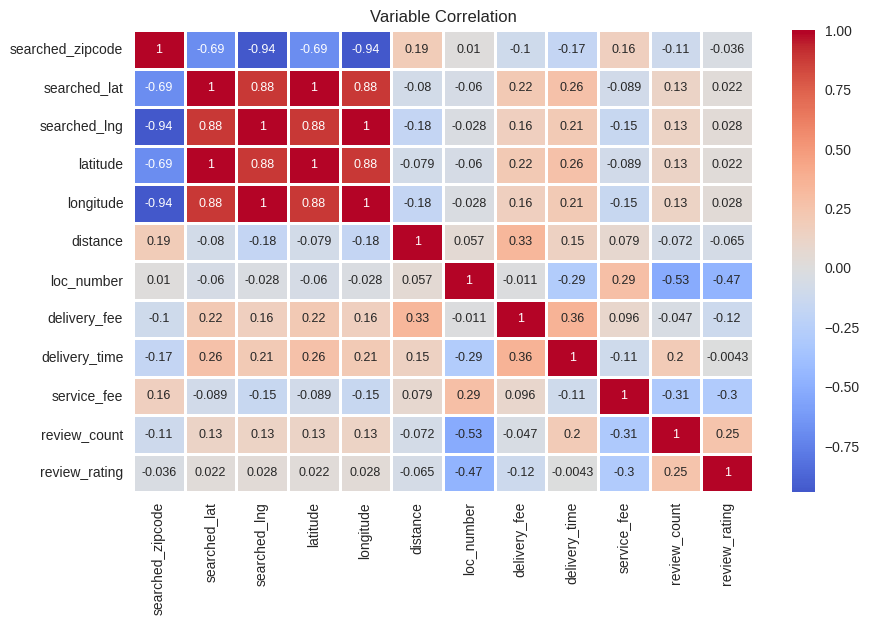

In [28]:

#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

In [ ]:
sns.pairplot(dfpd)

developed a pair plot to visually represent and analyze the relationships between several variables at once. With the help of this visualization, trends, correlations, and patterns that may require more investigation were successfully found. Occasionally, the plot's diagonal indicates a univariate distribution. Similarly, scatterplots display the variables against the indicated columns.


In [45]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_2_AutoML_1_20240220_23940': 0,
 'StackedEnsemble_AllModels_1_AutoML_1_20240220_23940': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_23940': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_23940': 3,
 'GBM_3_AutoML_1_20240220_23940': 4,
 'GLM_1_AutoML_1_20240220_23940': 17}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

In [ ]:
best_model1.algo

In [ ]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

##**Checking if assumptions violated**

Checking if the model has violated any assumptions. For linear regression some of the assumptions are:

(1)There needs to be linear relation between the independent and dependent variable.

(2)Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.

(3)Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.

(4)There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [ ]:
#Seperating the predictor and target variables
A=dfpd.drop(['review_rating'],axis=1)
B=dfpd['review_rating']

In [ ]:

#Splitting the data
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)

Here we are check if the Homoscedasticity (normality of the error distribution) assumption is satisfies. A normal distribution of errors is expected.

In [ ]:
cols1 = ['distance','delivery_fee','delivery_time','service_fee','review_count']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))

In [ ]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [ ]:
sns.histplot(dfpd.review_rating, kde = True)

**Ridge Regularization in H20**

Regression's primary goal is to identify patterns in the underlying dataset and extrapolate them to predict the target value that corresponds to certain new values of independent variables. However, random noise can occasionally be introduced into the target dataset. When predicting the proper target values for the test dataset, there will be significant errors even though there might not be any for the training set.Regularization is employed in order to avoid this problem. By including an extra term in the noise function, regularization is a technique for fine-tuning the random noise function. This extra term regulates the overly fluctuating function so that the target value prediction for the test data is not significantly impacted and the coefficients do not take extreme values. The Ridge Regularization is applied to this model.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
rating_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
rating_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
rating_glm_regularization.train(x = X, y = y_numeric, training_frame = df_train)

##**Data Report**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_23940,0.313388,0.0982119,0.219018,0.0681813,0.0982119,524,0.053626,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240220_23940,0.3138,0.0984703,0.21971,0.0688804,0.0984703,738,0.143332,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20240220_23940,0.313854,0.0985044,0.219524,0.0683543,0.0985044,1096,0.131599,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_23940,0.31462,0.0989855,0.220441,0.0685537,0.0989855,875,0.051447,StackedEnsemble
GBM_3_AutoML_1_20240220_23940,0.317779,0.100984,0.224686,0.0737354,0.100984,1800,0.037666,GBM
GBM_2_AutoML_1_20240220_23940,0.319284,0.101942,0.22374,0.0748191,0.101942,1371,0.030391,GBM
GBM_5_AutoML_1_20240220_23940,0.320073,0.102447,0.226129,0.0750014,0.102447,1110,0.048363,GBM
XGBoost_3_AutoML_1_20240220_23940,0.320571,0.102766,0.22179,0.0667262,0.102766,920,0.004584,XGBoost
GBM_4_AutoML_1_20240220_23940,0.323745,0.104811,0.230655,0.0759015,0.104811,2587,0.031851,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_23940,0.326022,0.10629,0.231275,0.0754826,0.10629,1252,0.056735,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

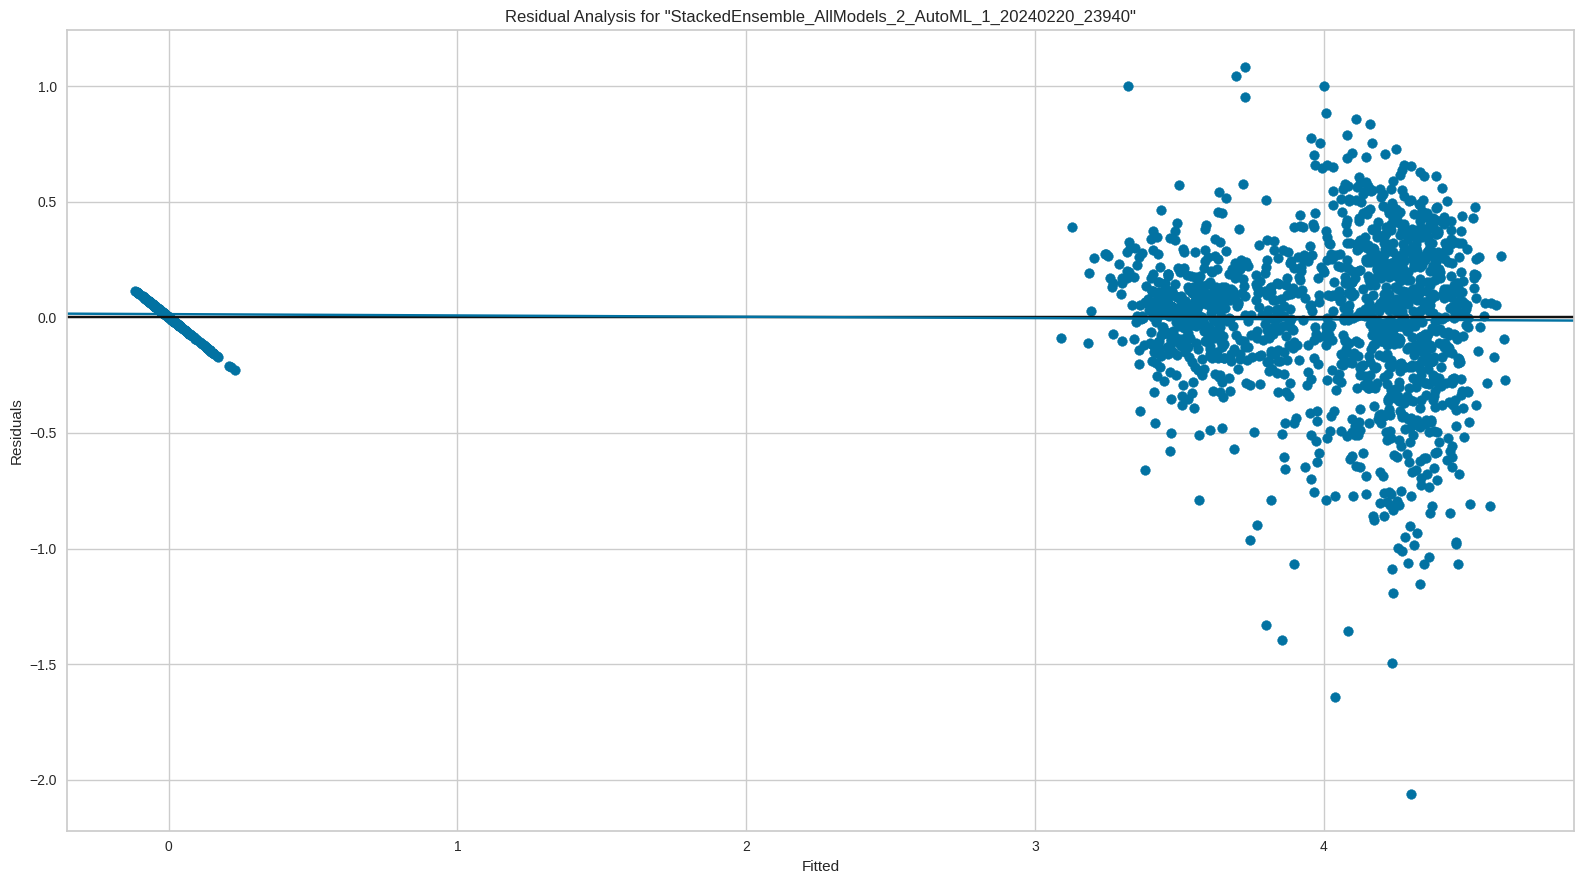

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

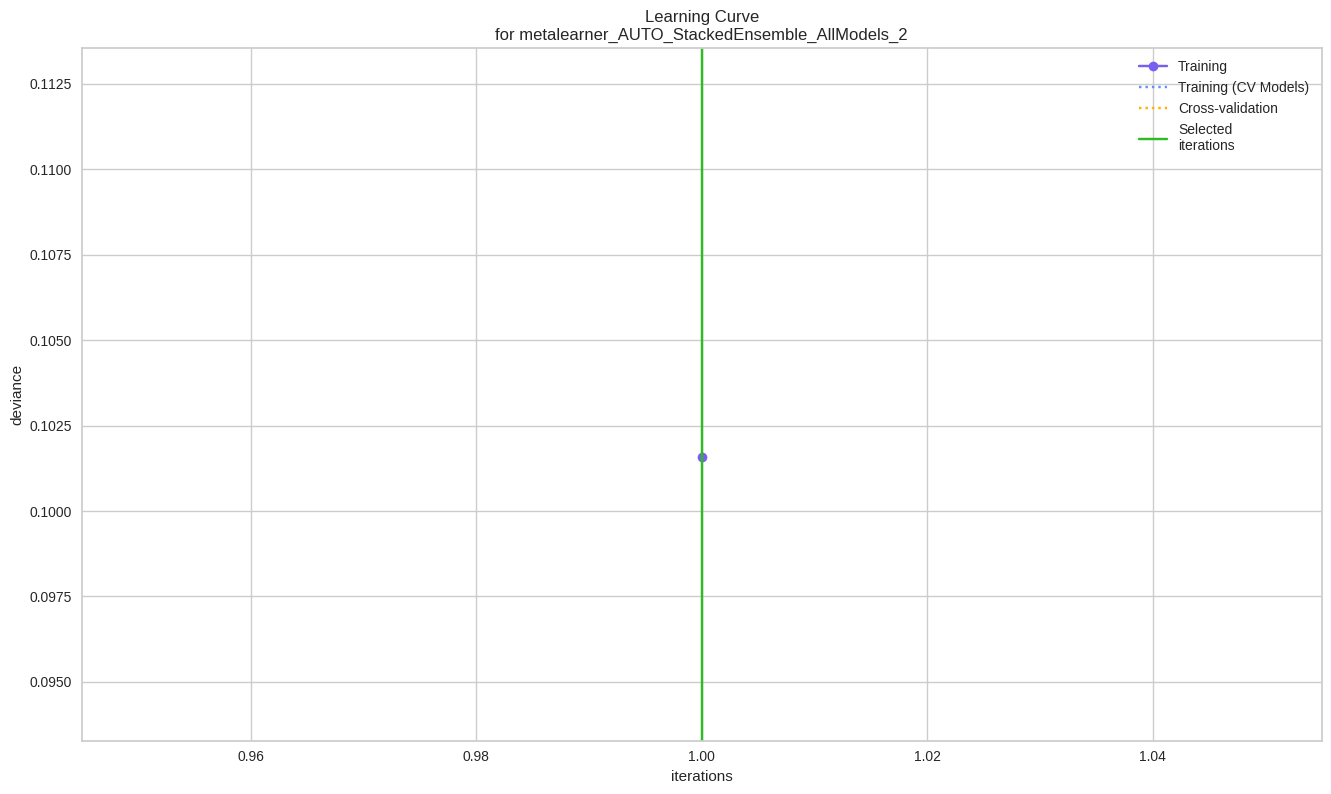

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

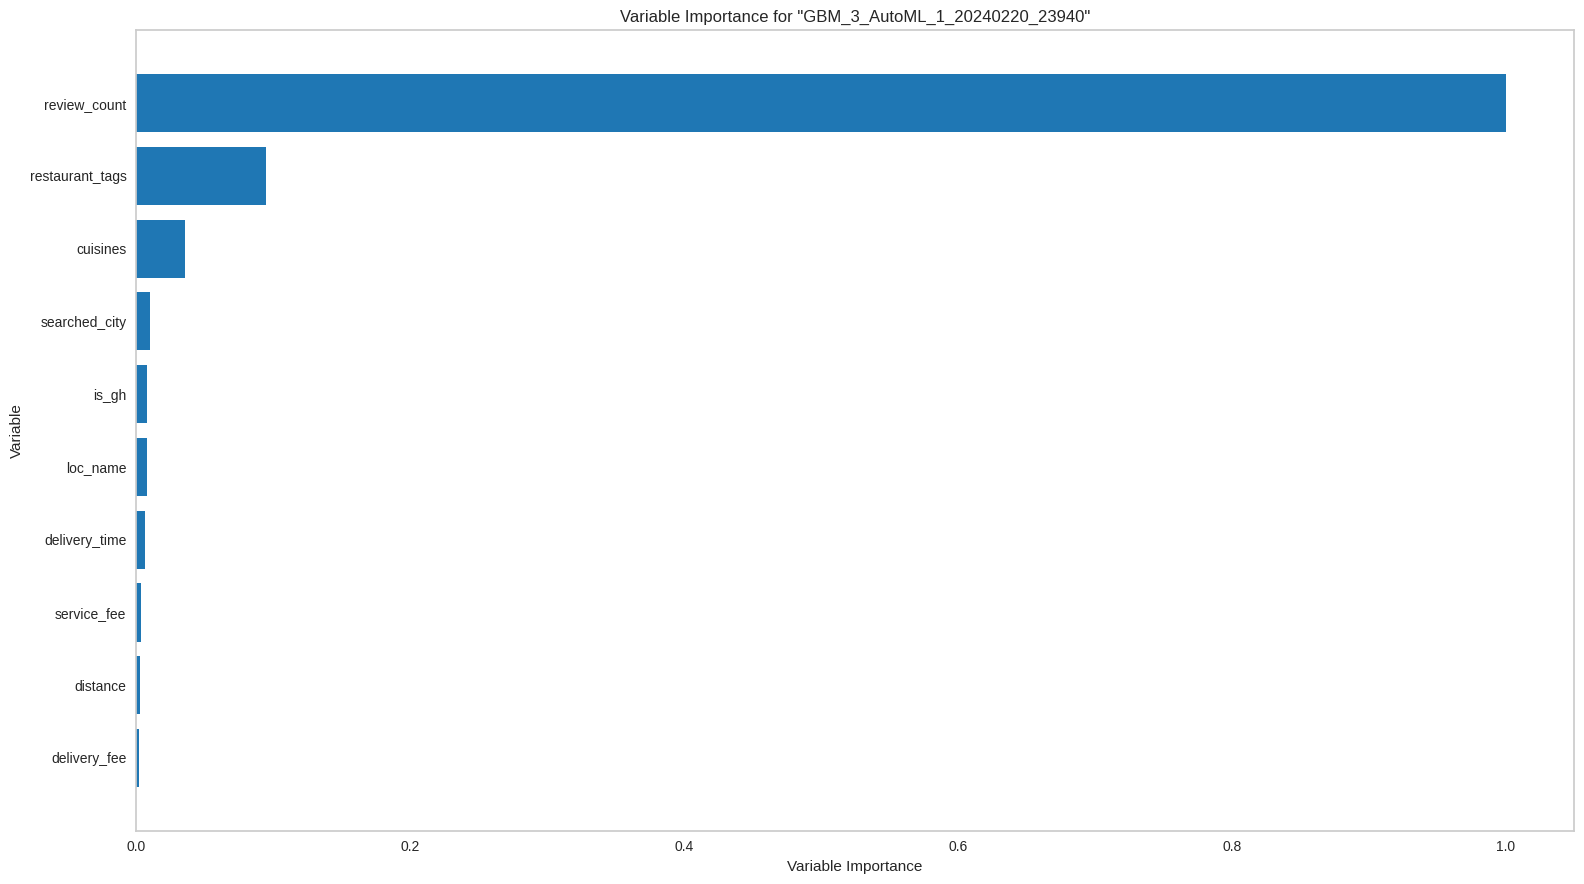

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

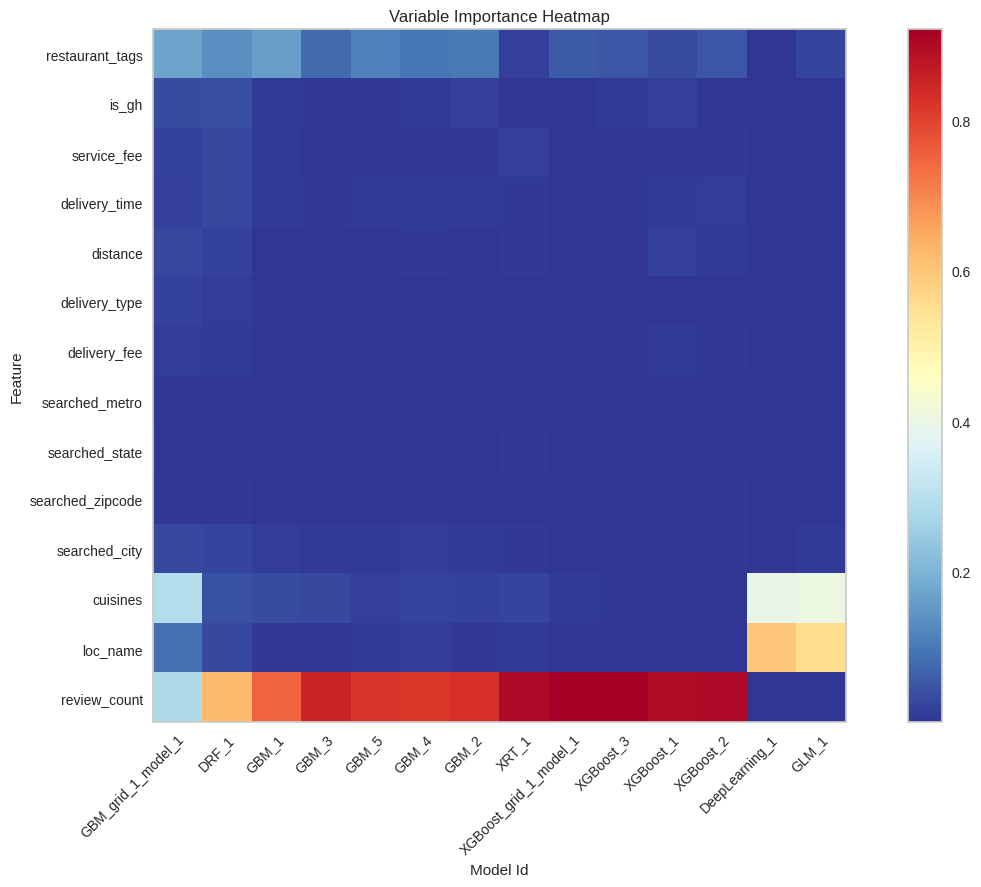

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

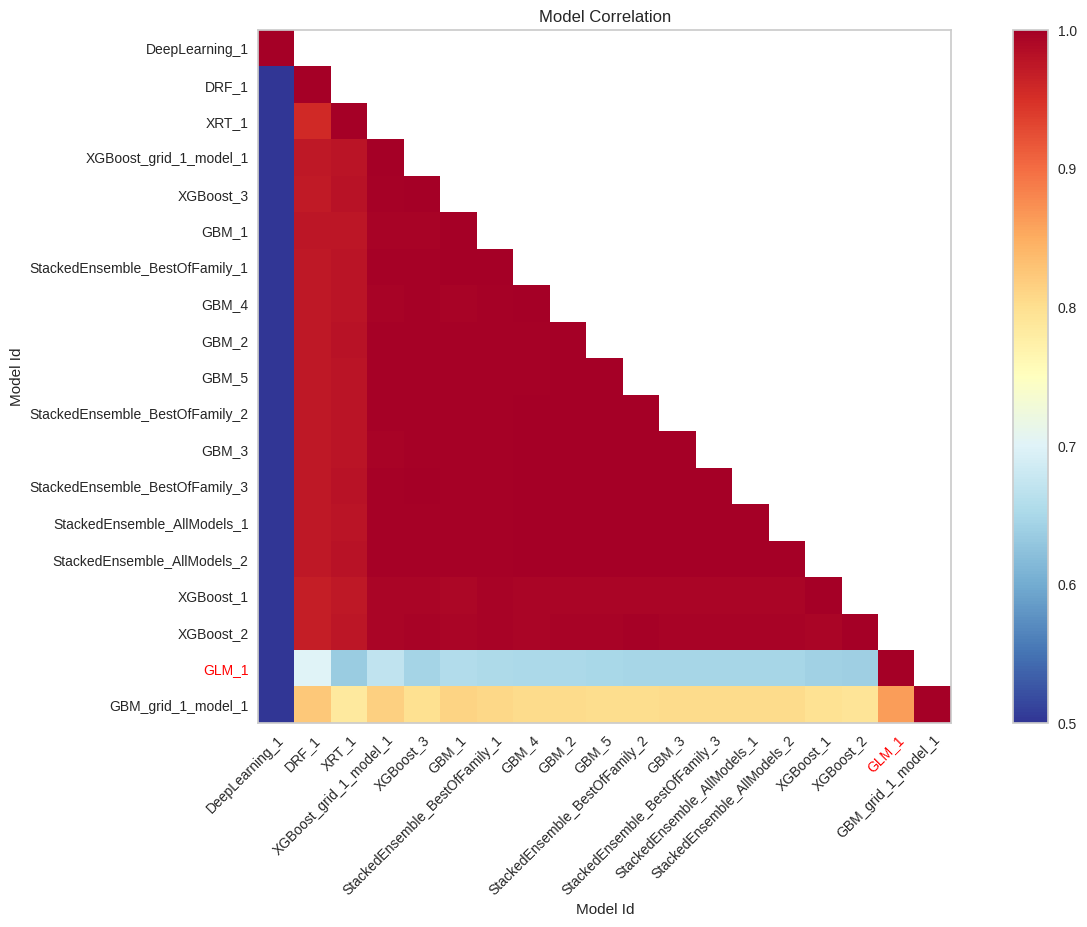

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

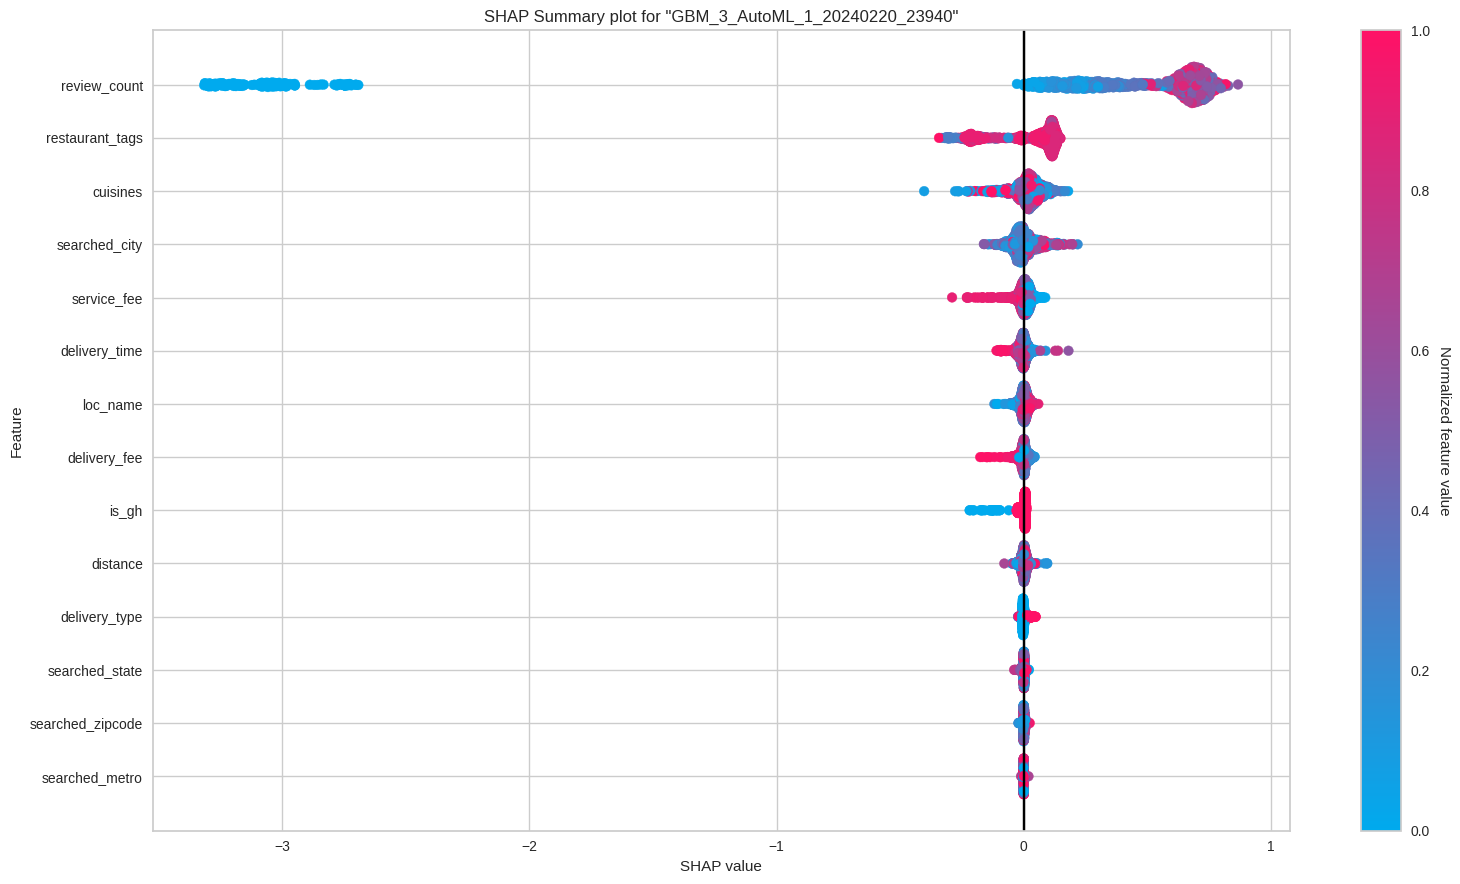

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

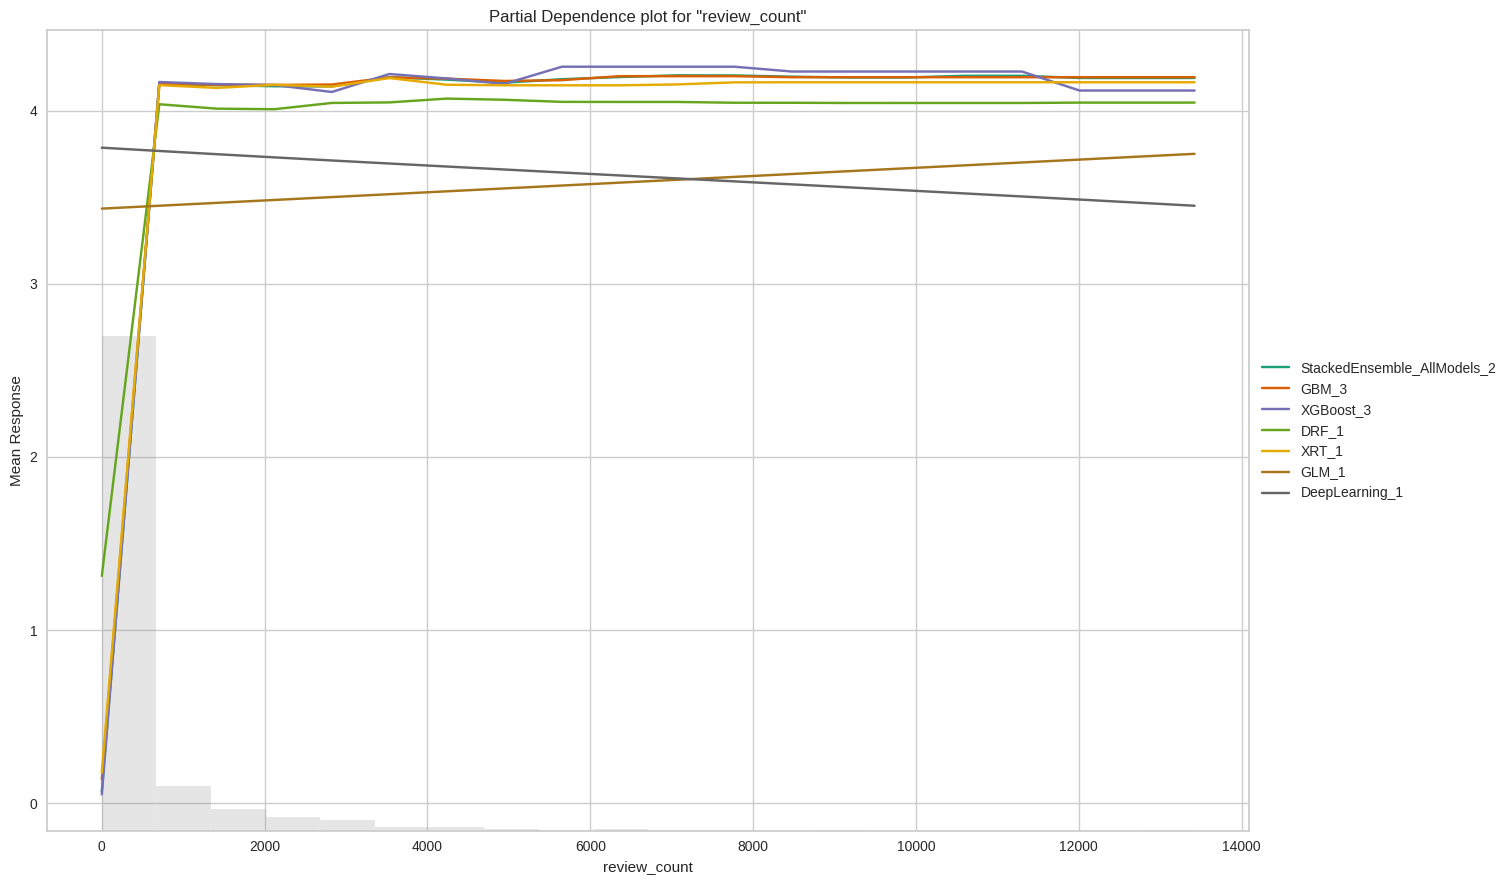

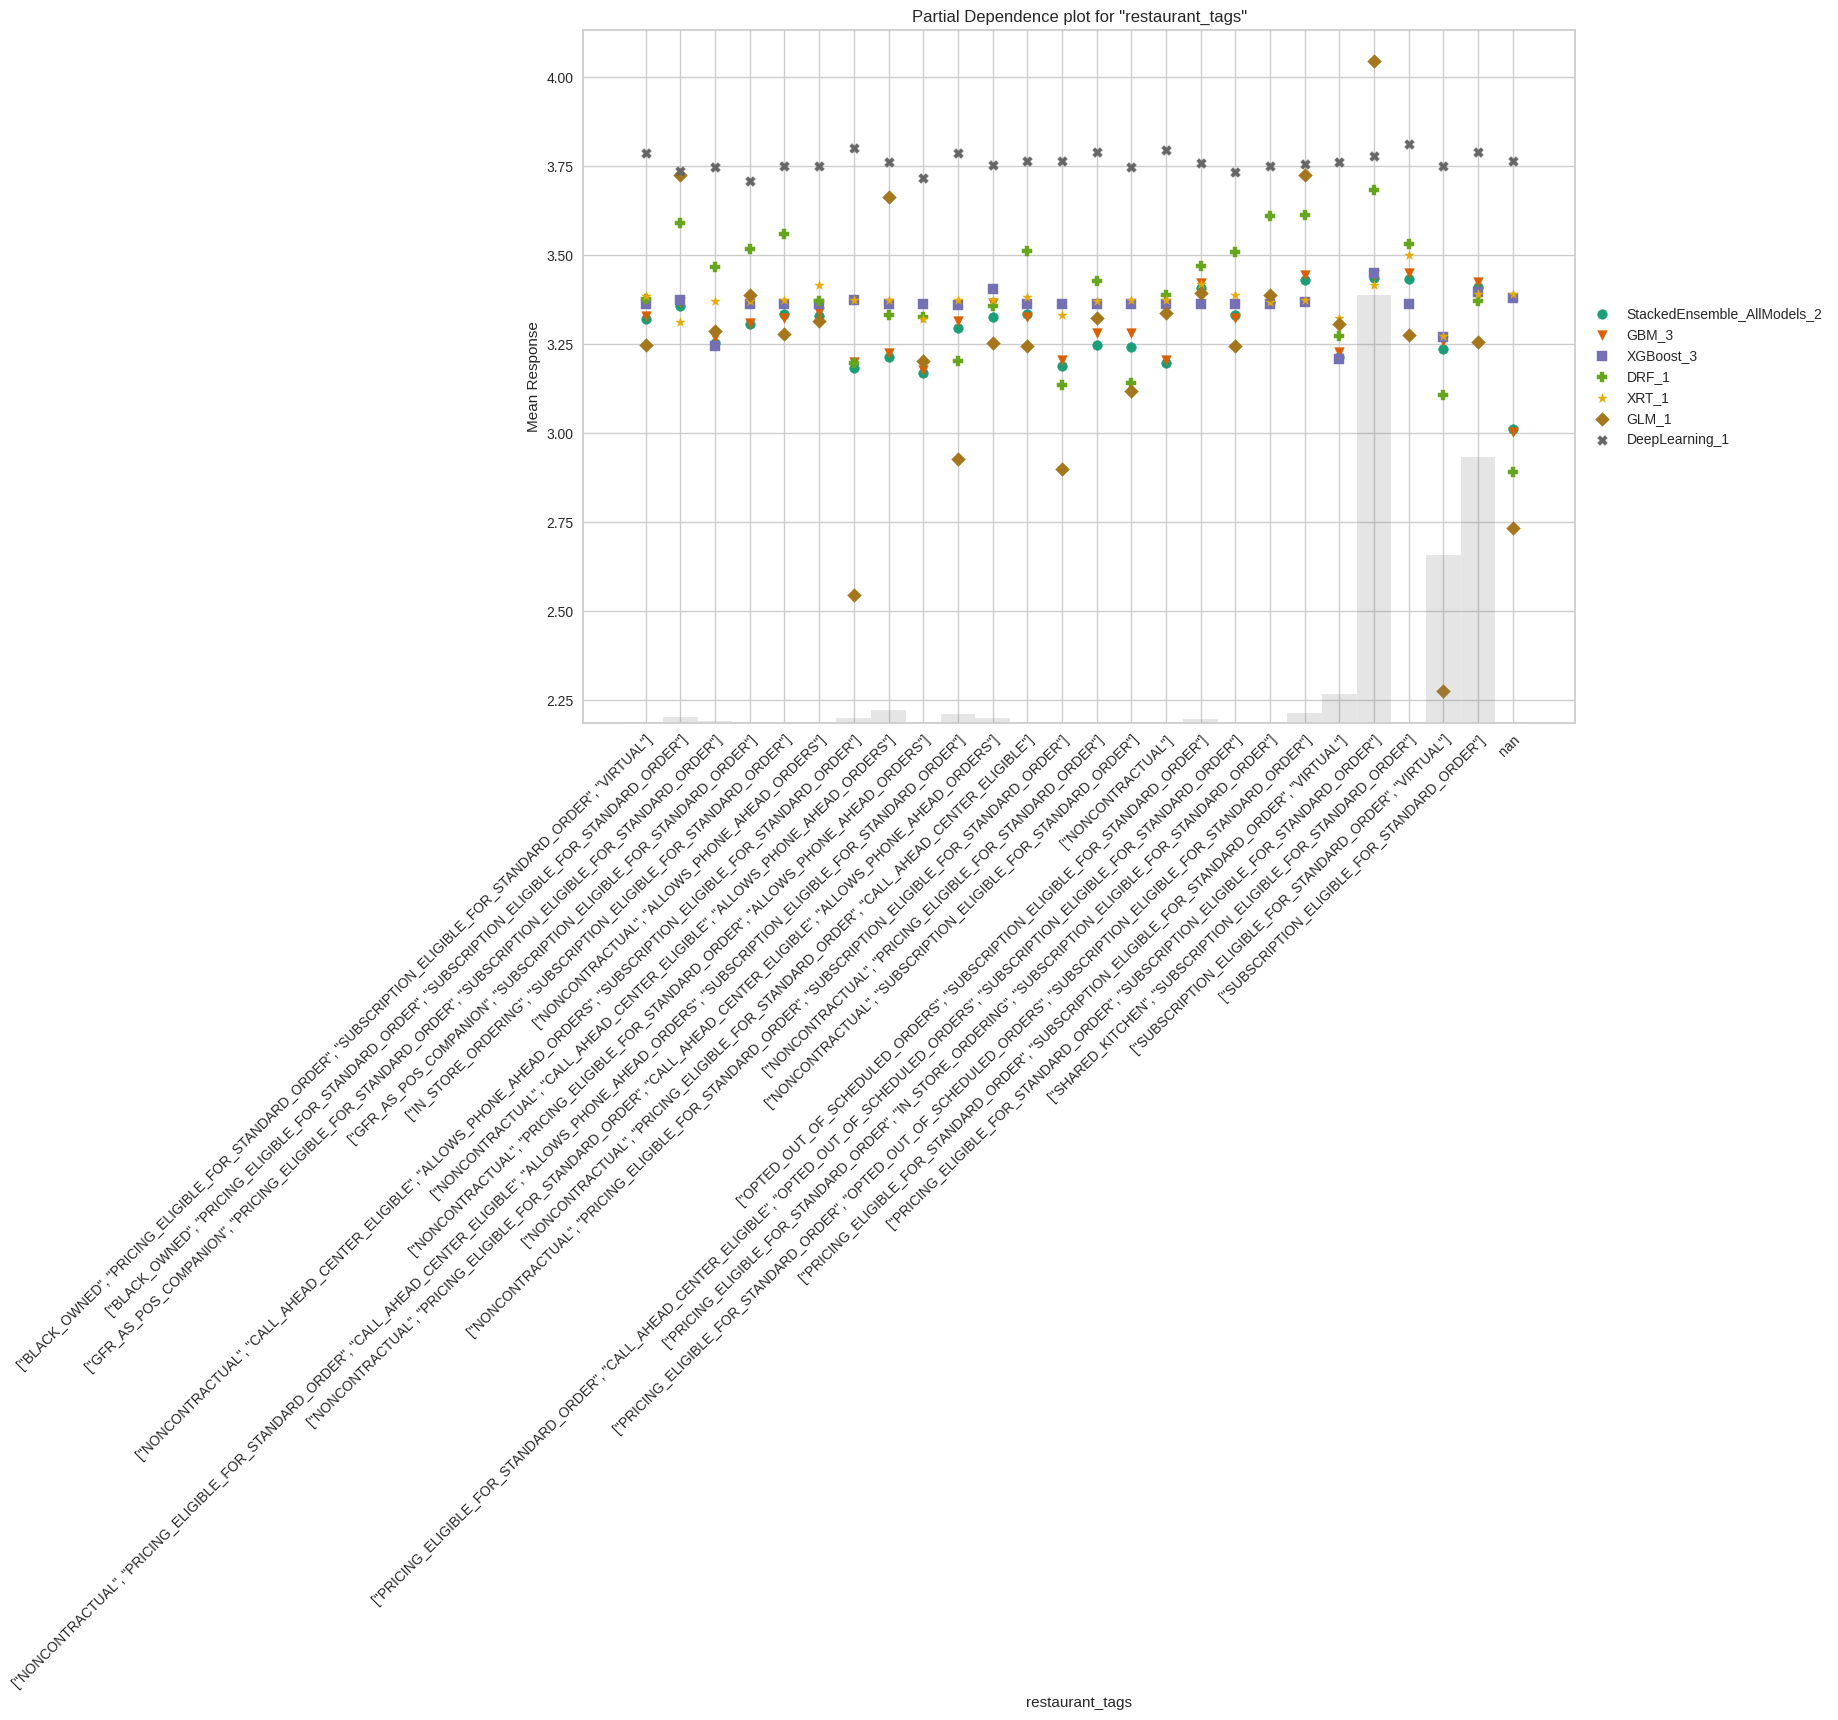

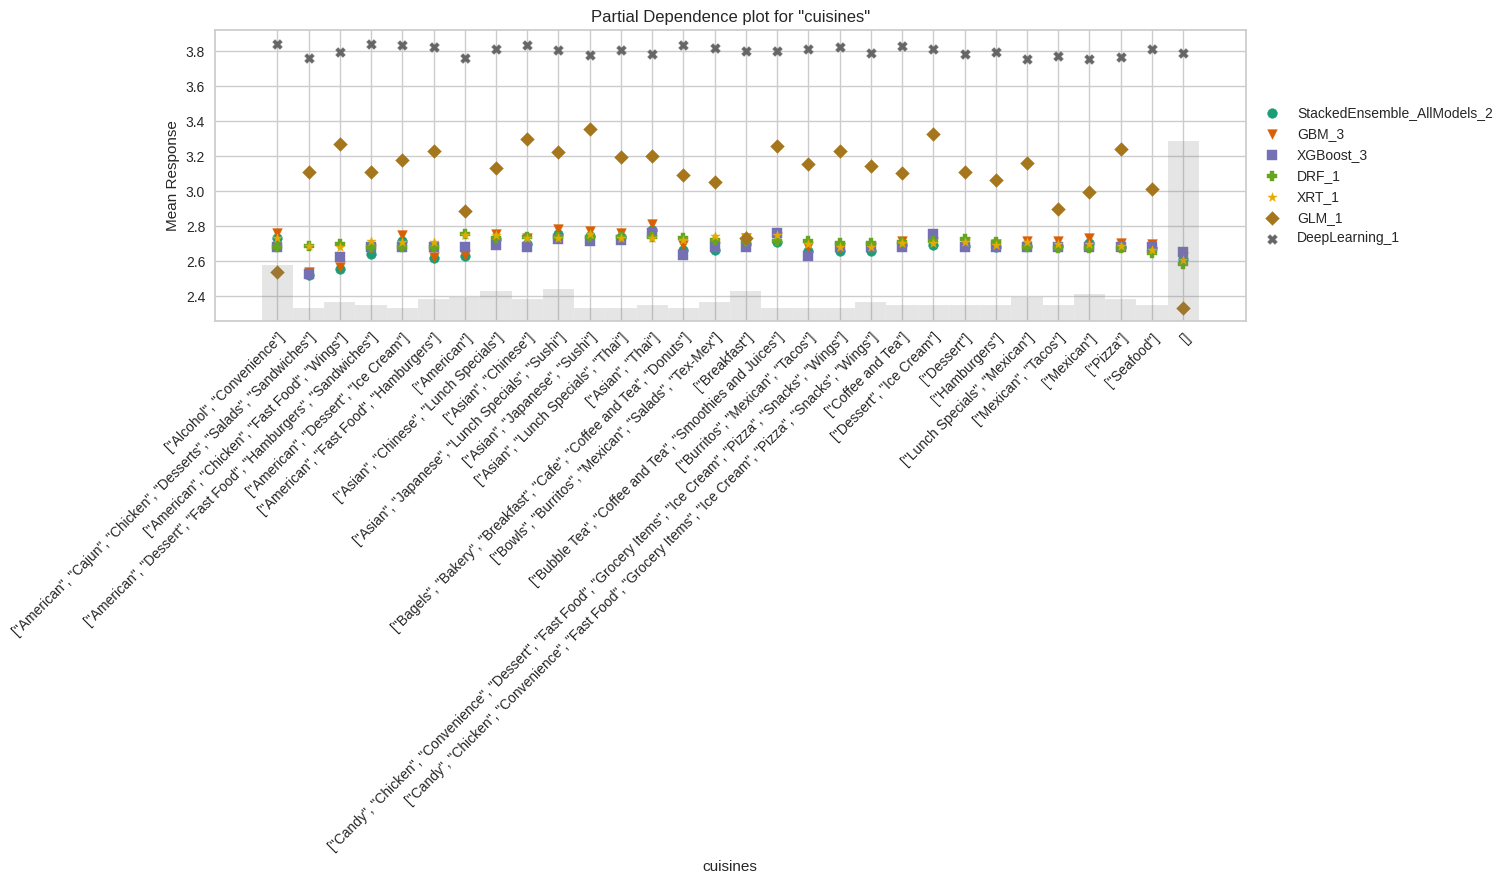

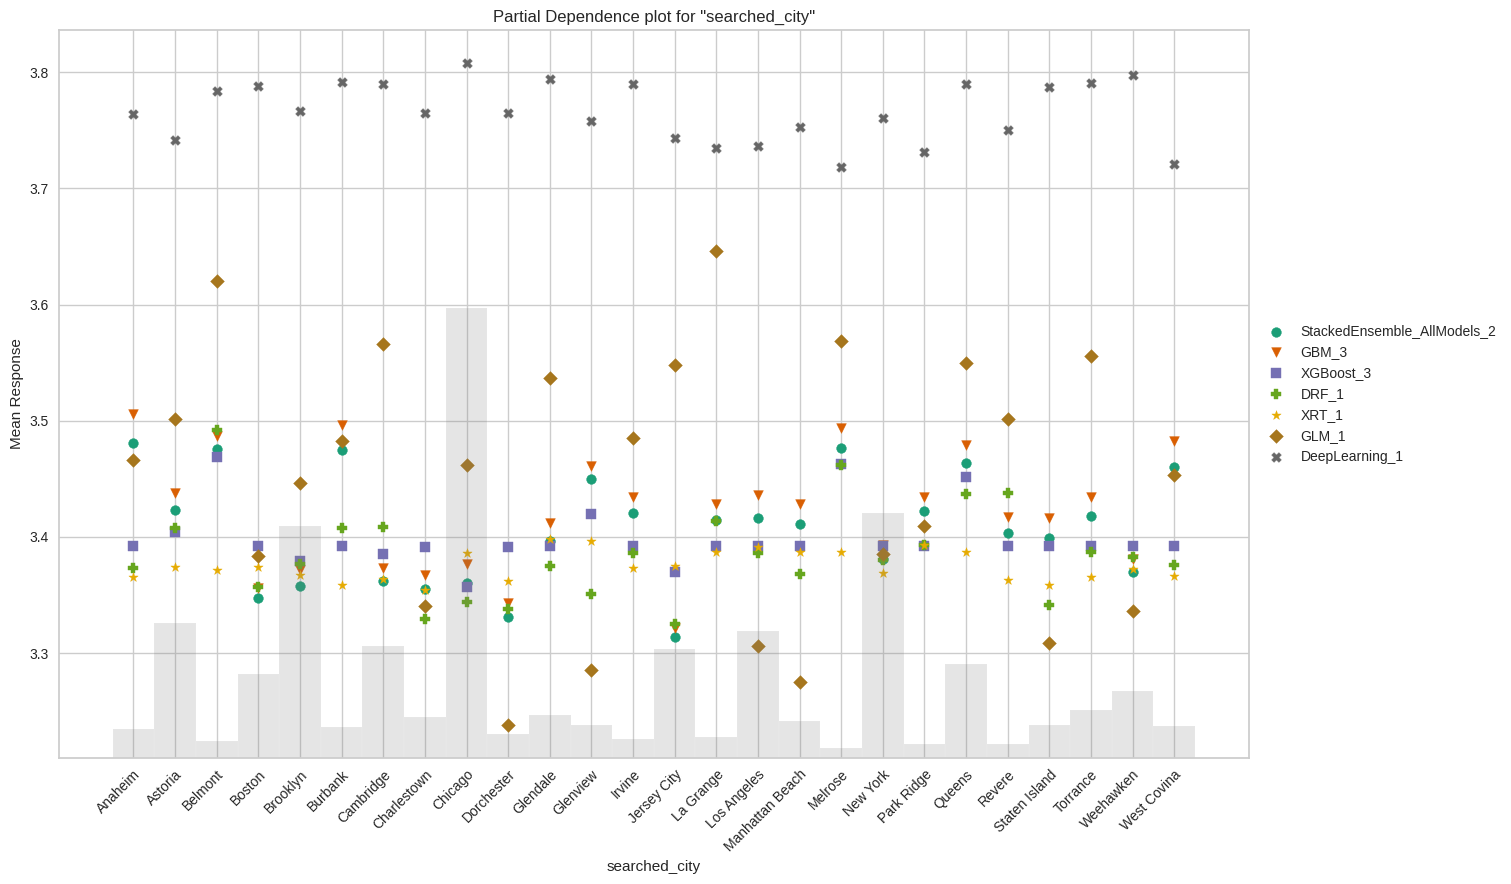

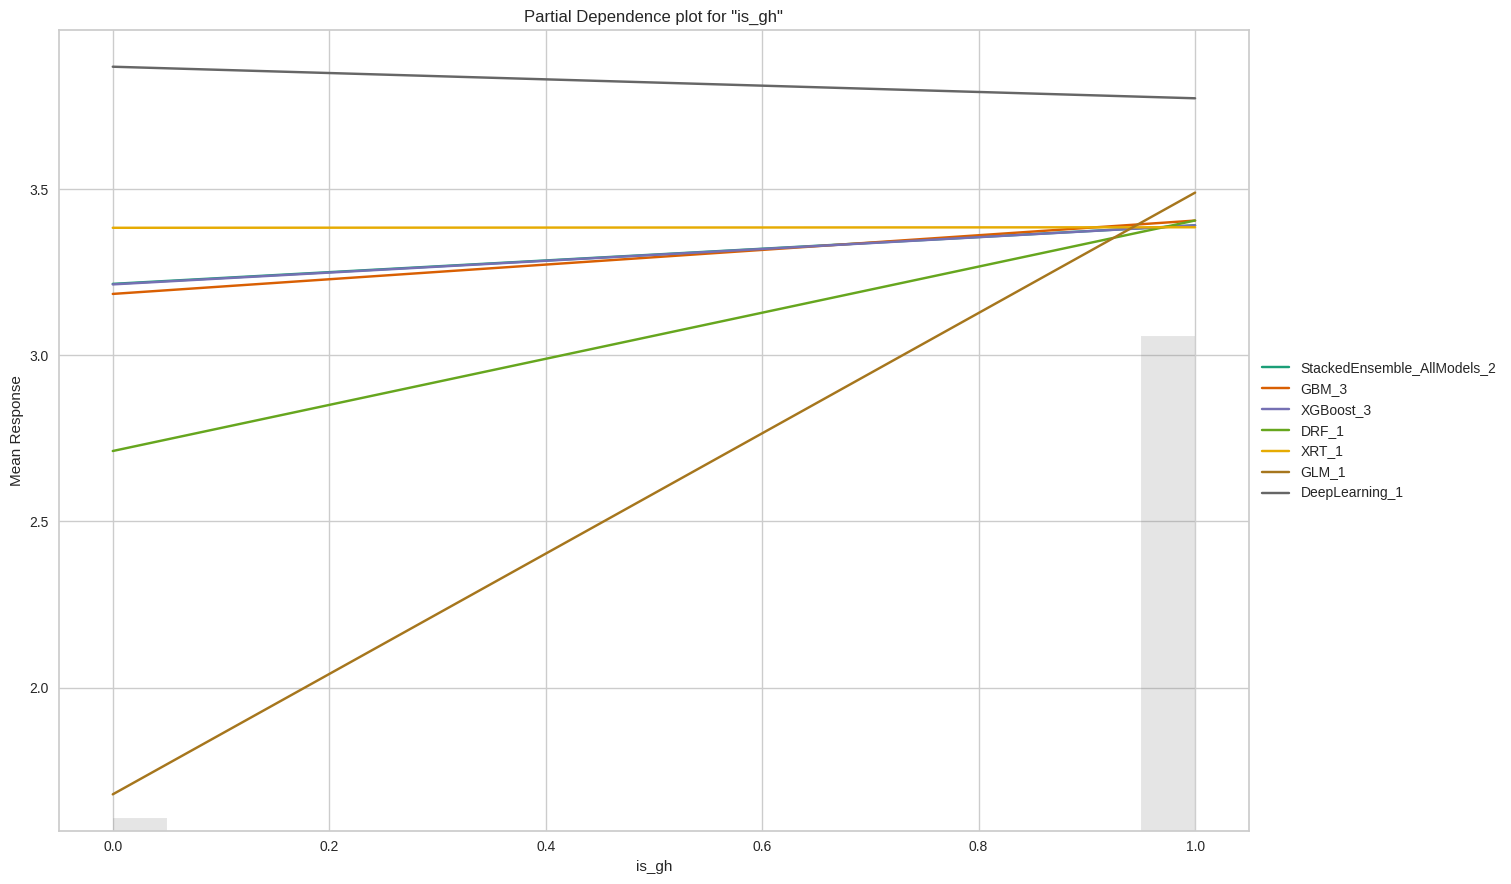

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

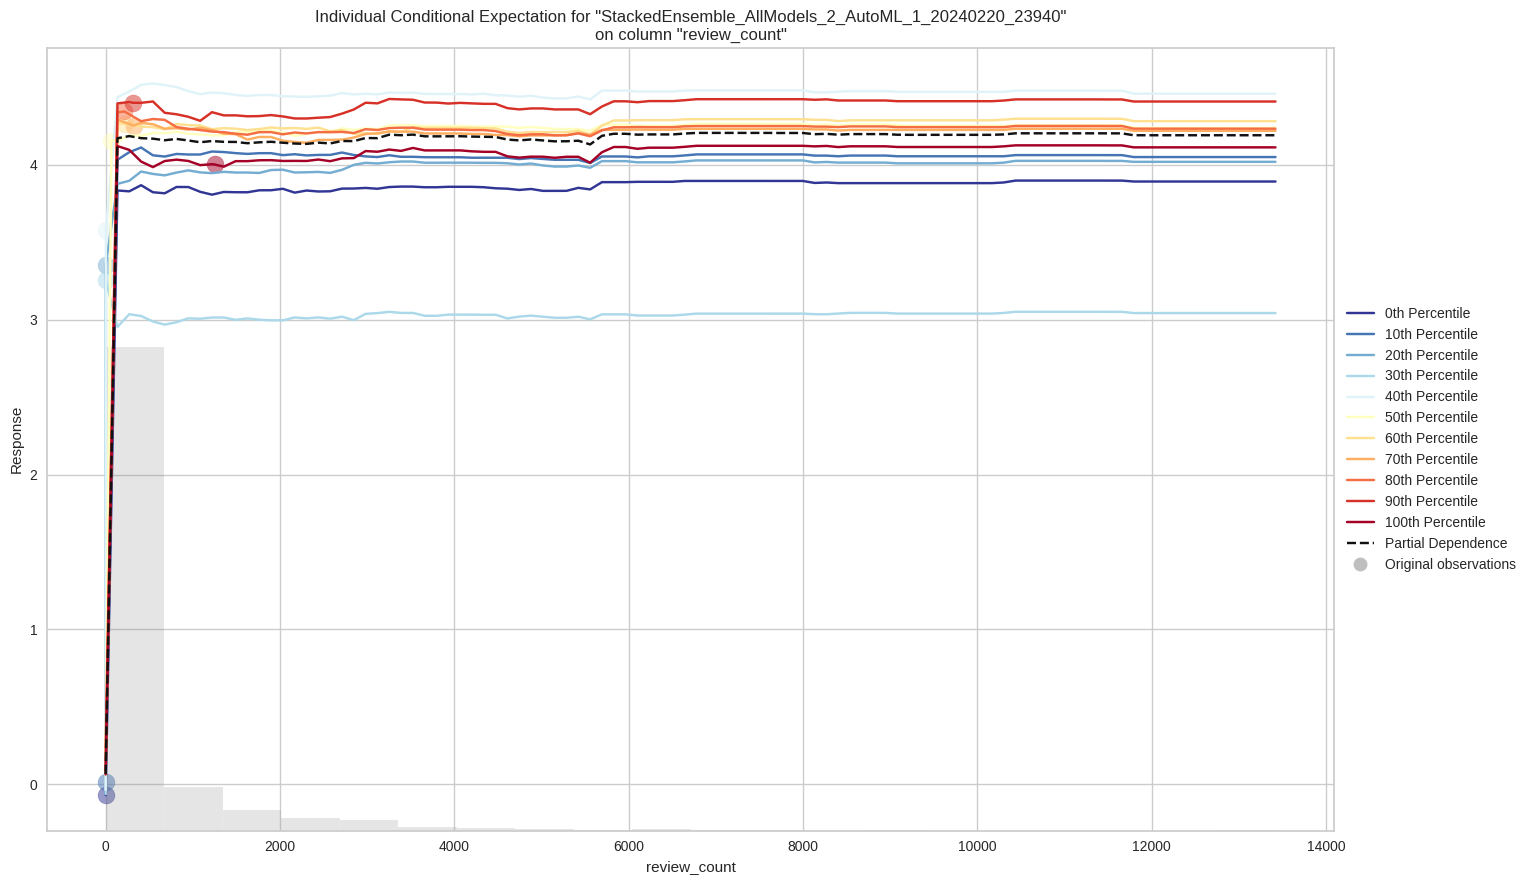

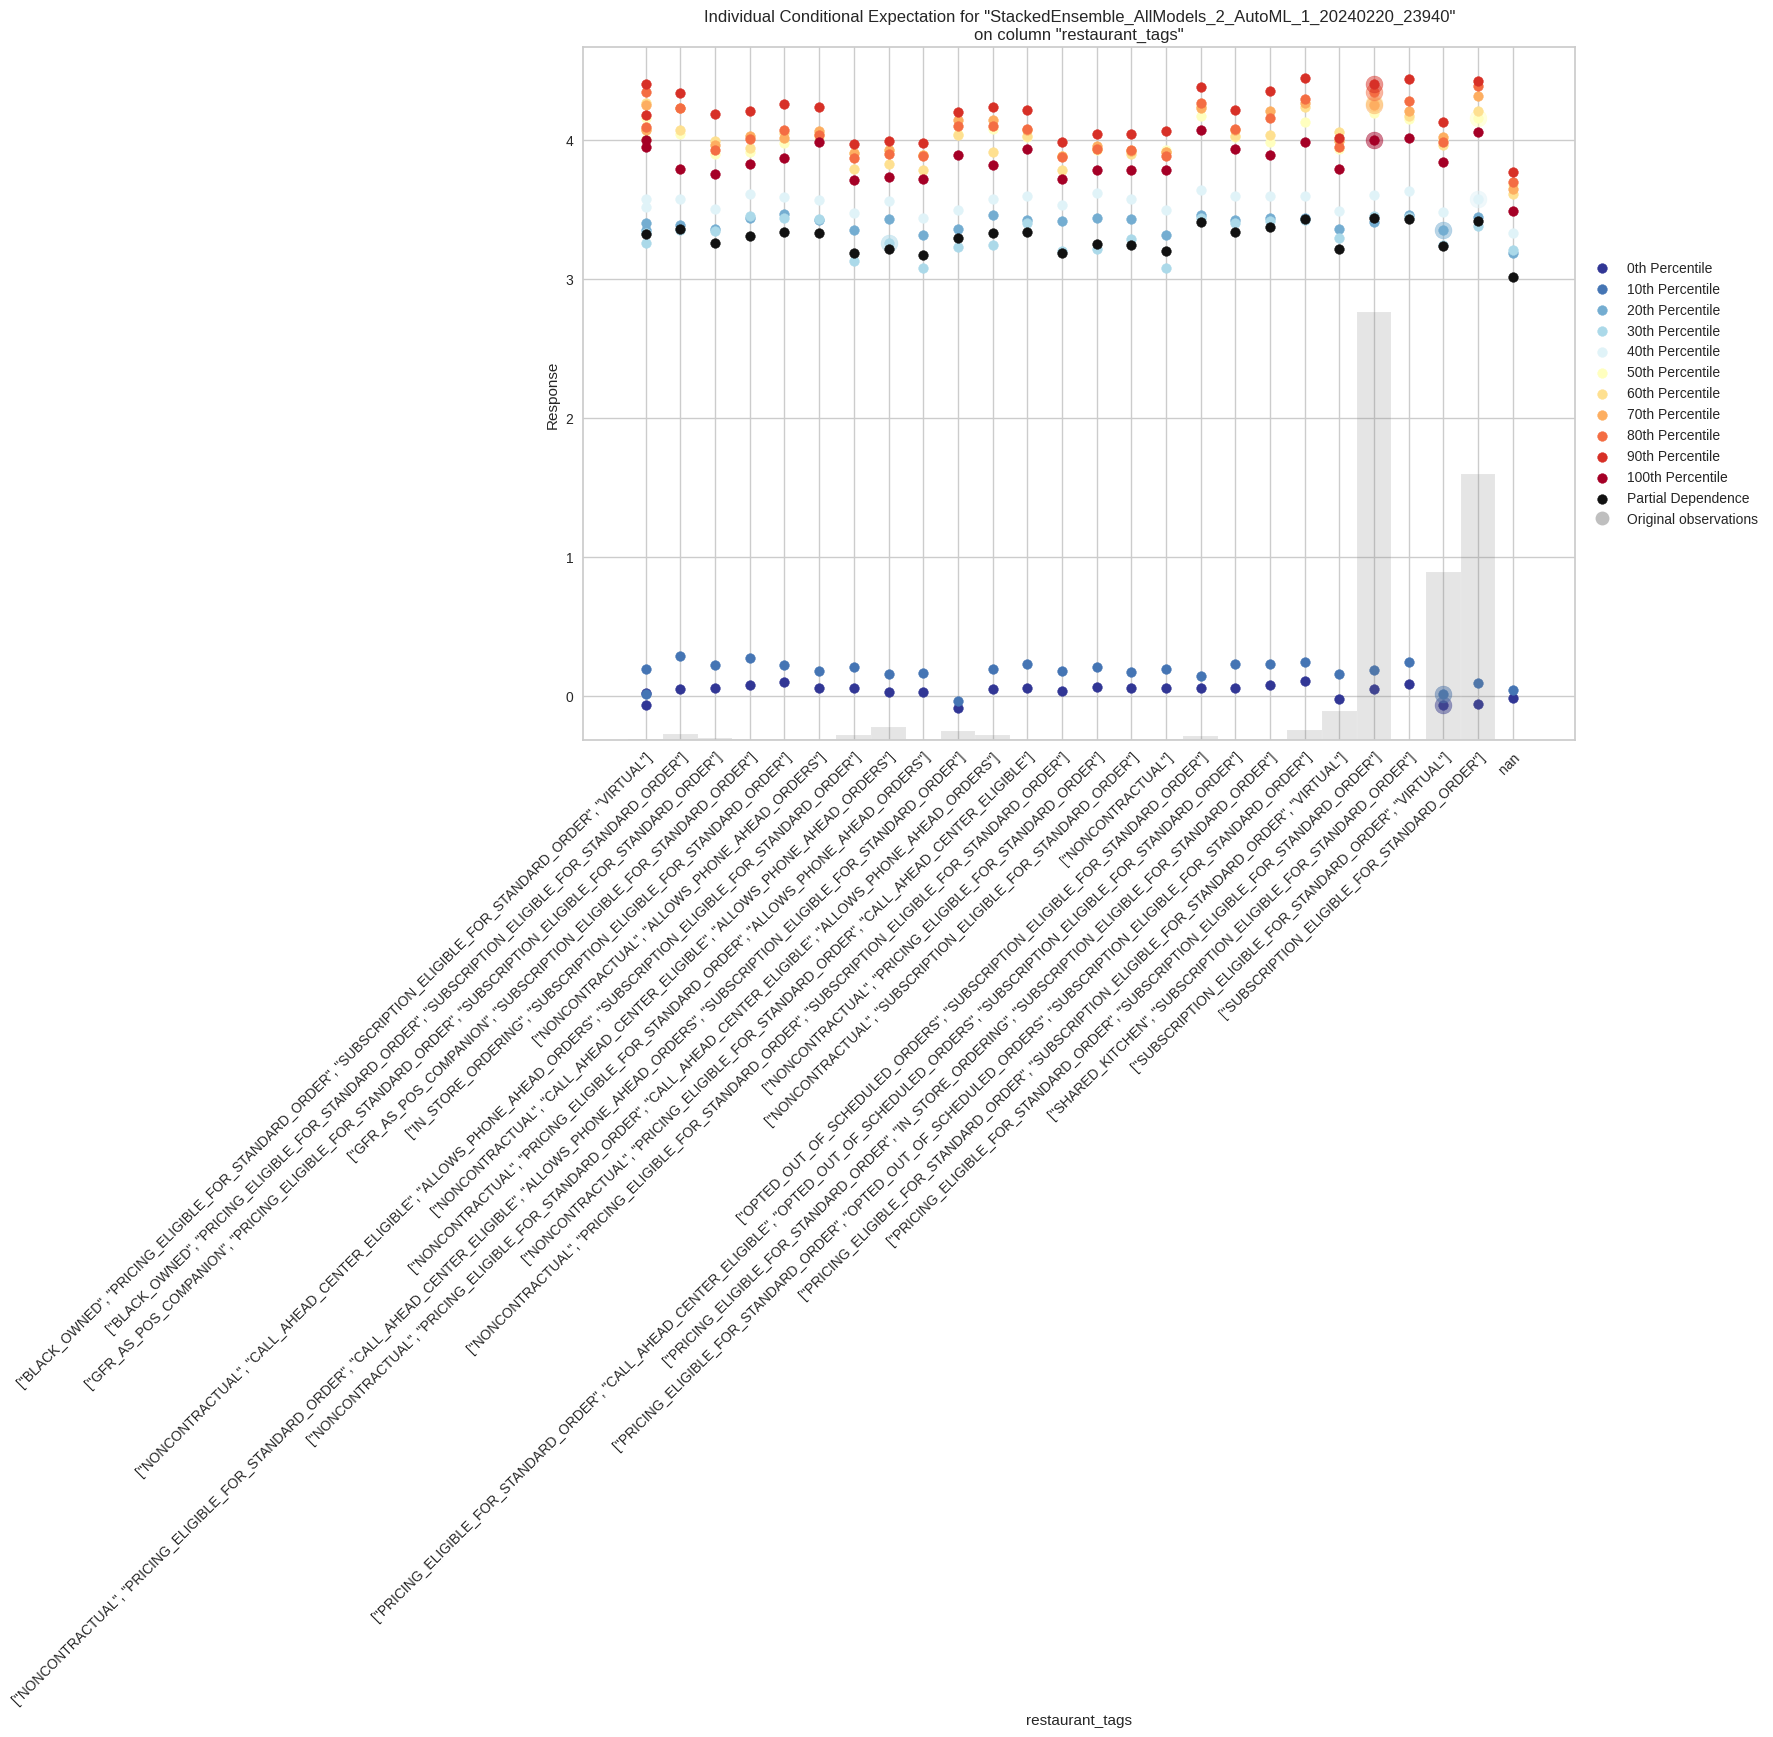

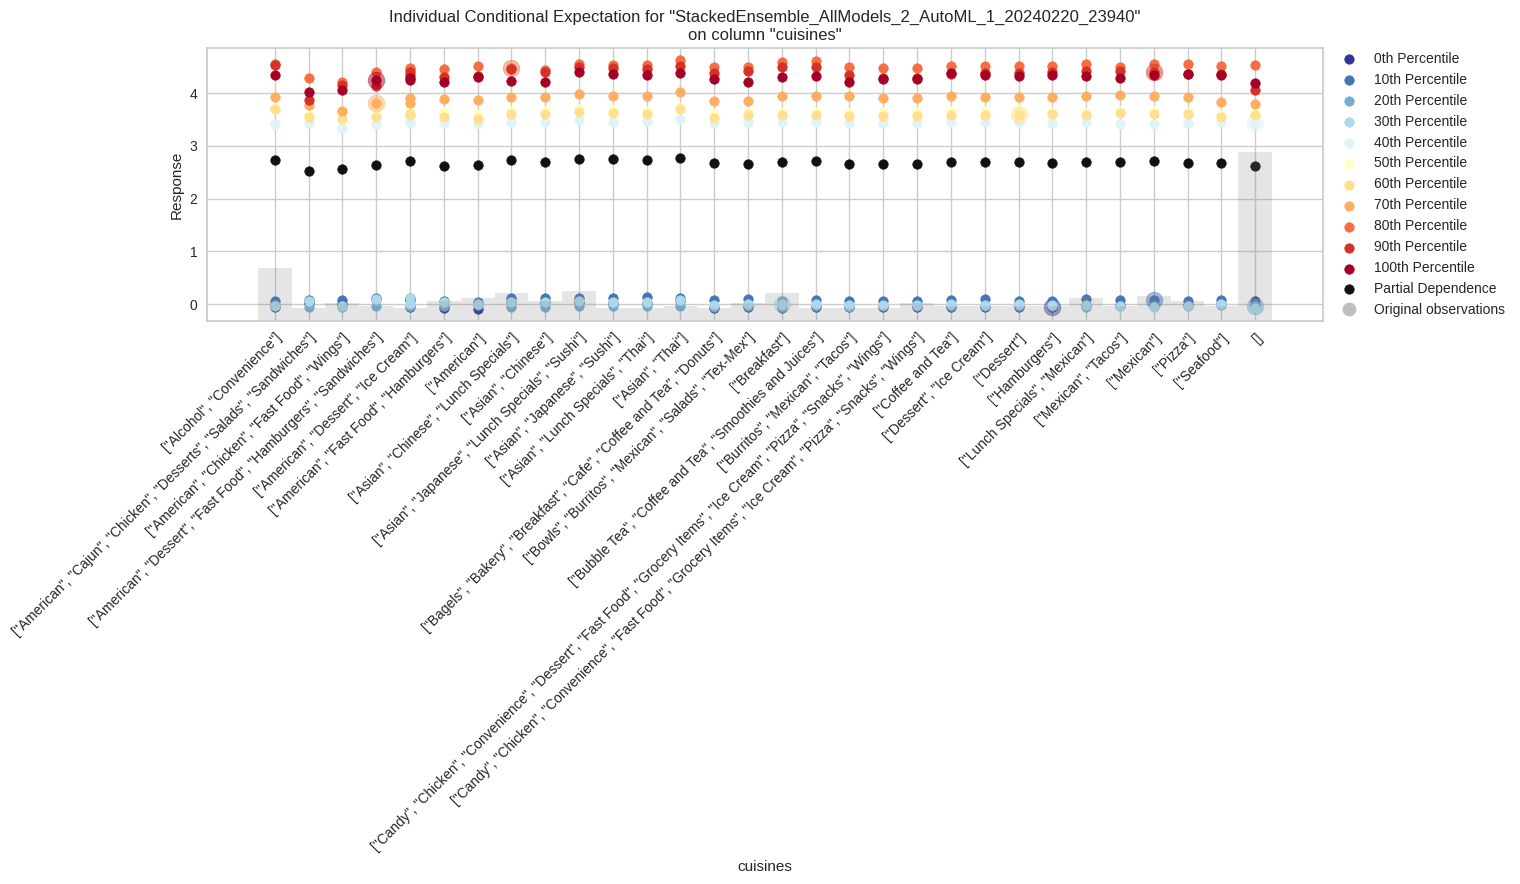

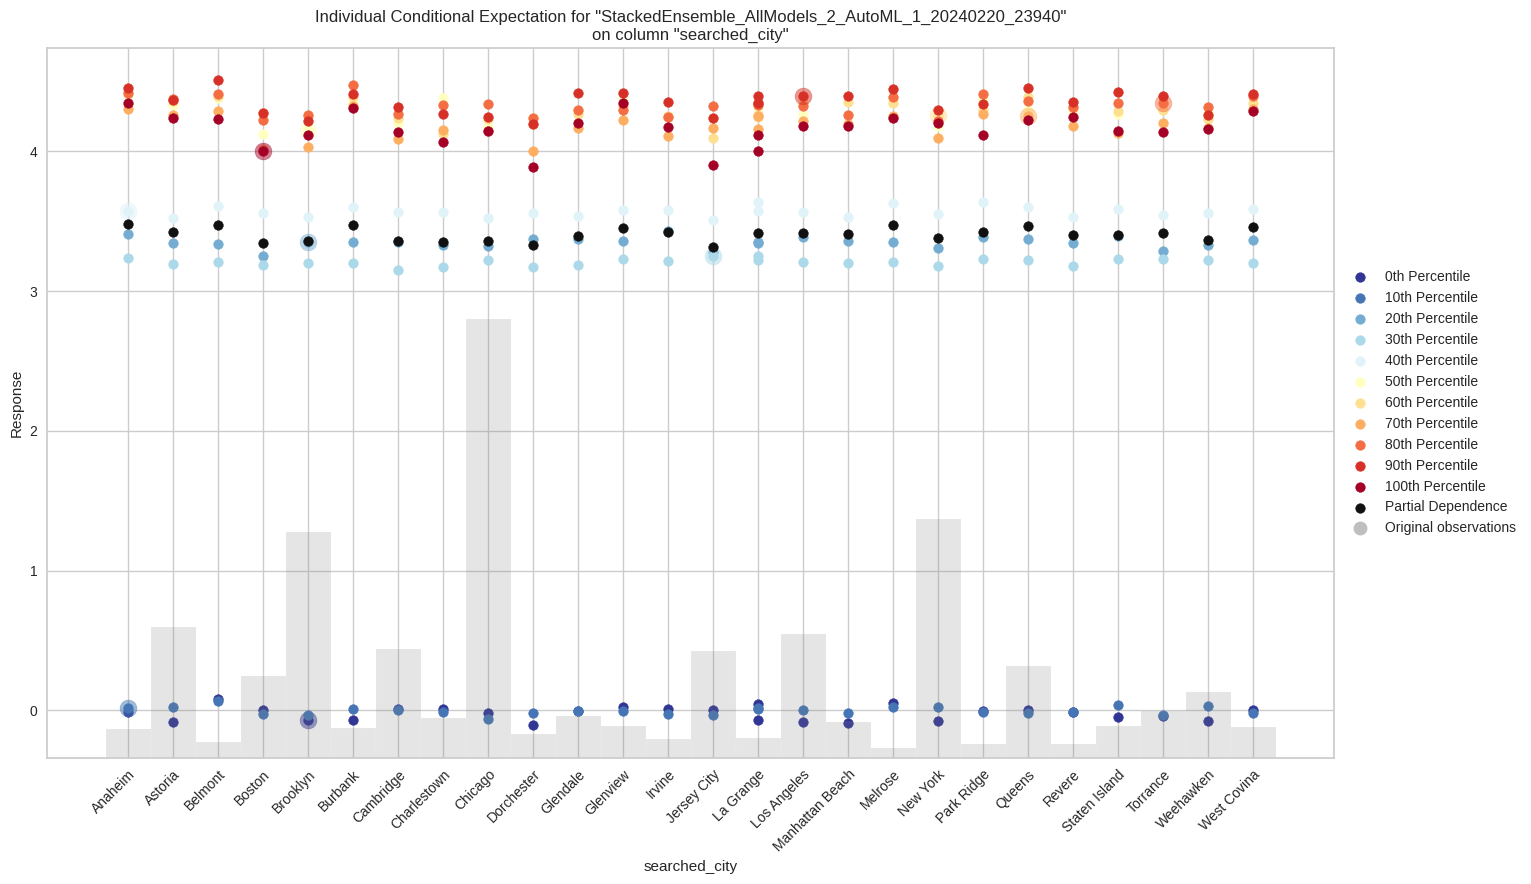

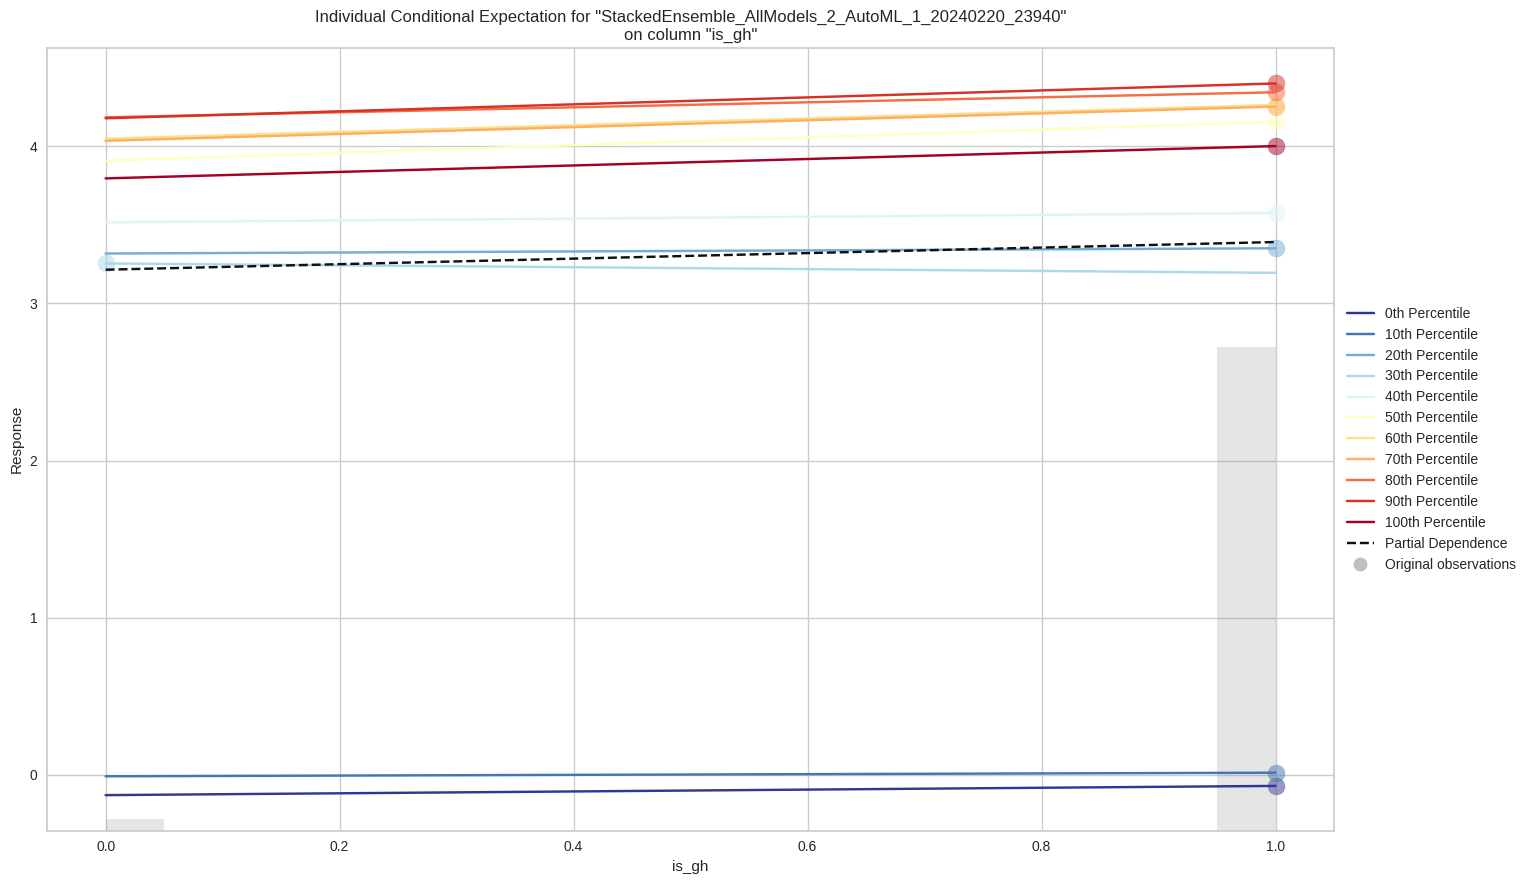

In [44]:
exa = aml.explain(df_test)

##**Hyperparameter Tuning**

Hyperparameter tuning is used to determine the optimal hyperparameter setting and combinations of interacting hyperparameters for a given dataset. It selects a subset of values for the model hyperparameters that yields the greatest performance on a particular dataset after objectively searching through a variety of possibilities.

In [63]:
s = dfpd1['review_rating']

t = dfpd1.drop(['review_rating'], axis = 1)

In [60]:
dfpd1.head()

,distance,delivery_fee,delivery_time,service_fee,review_count,review_rating
0,0.04,0.00,40.0,0.00,1691,4.57
1,0.04,0.00,45.0,0.00,697,4.77
2,0.06,1.99,27.5,10.00,11,3.67
3,0.07,1.99,30.0,7.25,208,4.05
4,0.08,1.99,30.0,5.25,0,0.00


In [64]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [65]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [66]:

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [67]:
random_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 800}

#**Assignment Question/Answers**

**Q1) Is the relationship significant?**

is_gh[T.1]: The variable is_gh with a p-value of 0.000 is highly statistically significant. It suggests that whether a location is a ghost kitchen or not significantly impacts the target variable.

searched_zipcode: The p-value for searched_zipcode is 0.387, which is higher than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis, suggesting that this variable may not be statistically significant in predicting the target variable.

distance: The variable distance has a p-value of 0.012, indicating statistical significance at a typical alpha level of 0.05. Thus, distance likely has a significant impact on the target variable.

delivery_fee: With a p-value of 0.000, delivery_fee is statistically significant. It suggests that the delivery fee has a significant influence on the target variable.

delivery_time: The variable delivery_time has a p-value of 0.002, indicating statistical significance. This suggests that delivery time is likely to have a significant impact on the target variable.

service_fee: The p-value for service_fee is 0.000, indicating statistical significance. Thus, service fee likely plays a significant role in predicting the target variable.

review_count: With a p-value of 0.000, review_count is statistically significant. This implies that the number of reviews is likely to have a significant impact on the target variable.

**variables with p-values less than the chosen significance level (typically 0.05) are considered statistically significant and are more likely to be important predictors of the target variable, while variables with higher p-values may not significantly contribute to the model's predictive power.**


**Q2) Are any model assumptions violated?**

The notebook's analysis included checks for linear regression assumptions such as linearity, homoscedasticity, and the absence of multicollinearity. While specific graphs or tests for linearity and homoscedasticity were not detailed in the excerpts, the thorough approach to handling multicollinearity—specifically through the calculation of VIF values—indicates a proactive stance on ensuring model assumptions are met. The VIF calculation identified and addressed multicollinearity, suggesting that while this assumption was initially violated, corrective actions were taken.

**Q3) Is there any multicollinearity in the model?**

We identify multicollinearity issues through VIF calculations ; variables with VIF values greater than 10, indicating strong multicollinearity. We had no relevant variables with a VIF value > 10, hence we can conclude there wasn`t any multi collinearity.


**Q4) In the multivariate models are predictor variables independent of all the other predictor variables?**
Initially, the predictor variables in the multivariate models were not entirely independent, as evidenced by the VIF calculations that revealed significant multicollinearity among certain variables. However, after adjusting the model by removing highly correlated variables, the remaining predictors were rendered more independent from each other, aligning with the ideal scenario for multivariate modeling.


**Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

Use of AutoML and OLS regression provided insights into the significance of predictor variables. While specific variables were not mentioned in the shared excerpts, it is understood that variables contributing most significantly to the model's predictive power were identified and prioritized. Less significant variables, likely those with higher p-values and VIF scores, were excluded to optimize the model's performance. The most significant variables were: "review_count","restaurant_tags","searched_city","delivery_time"

**Q6) Does the model make sense?**
For a model to make sense it should follow all the assumptions, have expected p values, VIF between their respective ranges and RMSE should be as low as possible considering the minimum and maximum values of the target variable.
So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

**Q7) Does regularization help?**
By adding a new term to the noise equation, regularization is a technique used to improve the random noise function. This modification serves to moderate the function's excessive fluctuations, keeping the coefficients of the model within acceptable boundaries and preventing undue influence on the test data predictions. Regularization is primarily used to improve the accuracy of the model and lower the validation loss. Ridge Regularization was used on the training set for this model. It was observed that the coefficient of determination (R2) and the root mean square error (RMSE) were evaluated with and without regularization, producing the same results in each case.

**Q8) Which independent variables are significant?**

Variables are significant when p-value is less than 0.05. No variables in my dataset have a p-value less than 0.05, Hence, no variable is significant enough to predict the dependent variable.

**Q9) Which hyperparameters are important?**

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:-

'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 800



#**Licenses:**

1. Grubhub Restaurant Data : https://www.kaggle.com/datasets/polartech/grubhub-restaurant-data
2. MIT License

Copyright (c) 2024 Siddharth-Dattaram-Pawar

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
https://github.com/Siddharth-Dattaram-Pawar/DS_Assignments-/blob/main/LICENSE







#**REFERENCES**


H20.ai- https://h2o.ai/platform/ai-cloud/make/h2o/

OLS Model- https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols

Professor's AutoML Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

RandomForest CV :
https://stackoverflow.com/questions/71615078/how-to-do-cross-validation-on-random-forest

VIF : https://en.wikipedia.org/wiki/Variance_inflation_factor